juliette.jin

# ECG classification

Laurent Cetinsoy - Datadidacte


In [5]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

## A first naive model by extracting simple features


Your environment contains variables arr, nsr, and chf which respectively contain 10-second recordings of ECG signals extracted from three datasets on PhysioNet: one from a person suffering from arrhythmia, one from a person with a normal heart rhythm, and another from a person with heart failure.


Matplotlib  subplots (or any other library), display these signals on three subfigures (the subplots should be called with the parameter nrows = 3).
Can you find any differences between them?

In [6]:
arr = np.loadtxt('datasets/arr.txt')
chf = np.loadtxt('datasets/chf.txt')
nsr = np.loadtxt('datasets/nsr.txt')

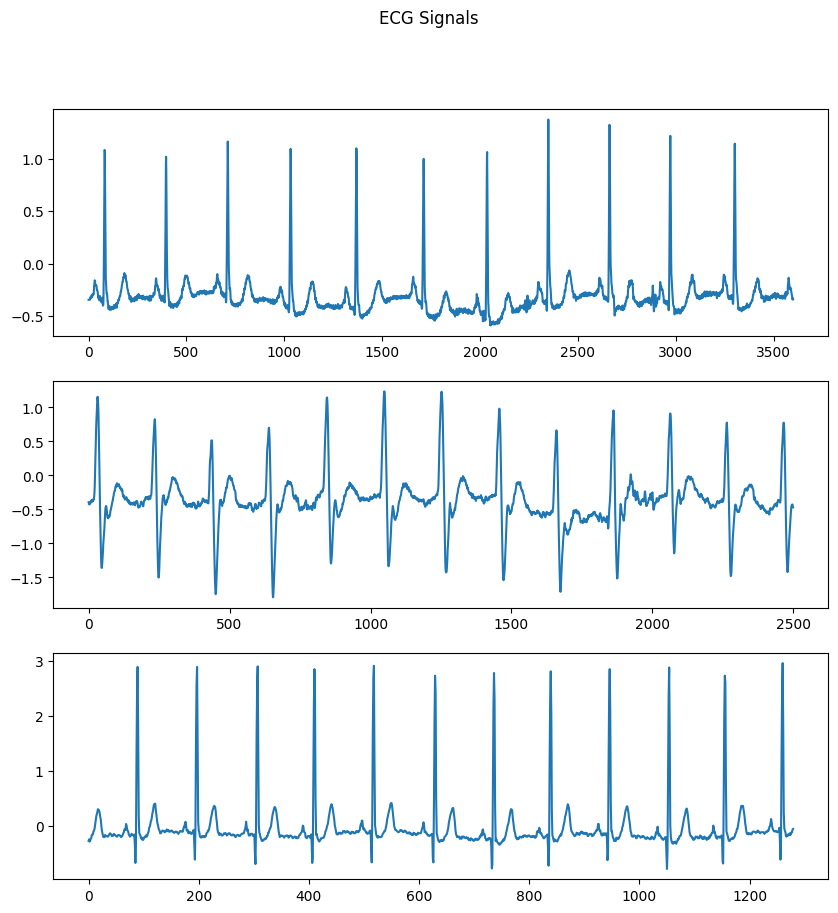

In [7]:
# Display the three arrays on three subfigures with nrows=3 using malplotlib
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('ECG Signals')
axs[0].plot(arr)
axs[1].plot(chf)
axs[2].plot(nsr)
plt.show()

The first and the third signals are kind of similar by their forms, the second is the most distinct one.

Yet the first and the third ones are not identical, the first one has a higher frequency than the third one.

We want to extract features from the time series. For that we will use simple statistics.


Create a function named calculate_stats_features(x) that calculates some statistical features of a signal x using standard numpy functions: nanpercentile, nanmean, etc.
calculate_stats_features will return a list of features in this order:

0. Max
1. Min
2. Mean
3. Median
4. Variance

In [8]:
def calculate_stats_features(x):
    return [np.nanmax(x), np.nanmin(x), np.nanmean(x), np.nanmedian(x), np.nanvar(x)]



Create a function named `calculate_zero_crossing(x)` that calculates the Zero
Crossing of a signal x.

The zero crossing is defined as the number of times the signal changes sign.
For this, you can use the signbit, diff, and nonzero functions from numpy.


In [9]:
def calculate_zero_crossings(x):
    return len(np.where(np.diff(np.sign(x)))[0])

Create a function named **calculate_rms(x)** that returns the Root Mean Square (RMS) of a signal x. We will use the nanmean function instead of the mean function from numpy.

In [10]:
def calculate_rms(x):
    return np.sqrt(np.nanmean(x**2))

Create a function named calculate_entropy(x) that calculates the Shannon entropy of a signal x using the entropy function from scipy.stats.

In [11]:
def calculate_entropy(x):
    hist,_ = np.histogram(x, bins=np.unique(x).size)
    return stats.entropy(hist)
    # return stats.entropy(*np.unique(x, return_counts=True))

Create a function get_features(x) that combines the features calculated by all previous functions including caculate_stats_features.

In [12]:
def get_features(x):
    return np.array(calculate_stats_features(x) + [calculate_zero_crossings(x), calculate_rms(x), calculate_entropy(x)])

Load the small ecg dataset
Use your fonction get_features create a new dataframe where you have all the feature as X and y as the label.
Train a random forest on it after doing a train test split if the dataset is not too small

In [13]:
df = pd.read_csv('datasets/ecg_small_dataset.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15352,15353,15354,15355,15356,15357,15358,15359,15360,15361
0,205,1,-0.429539,-0.431368,-0.427633,-0.453029,-0.460659,-0.448497,-0.469340,-0.475054,...,-0.299412,-0.341126,-0.364847,-0.360565,-0.358913,-0.406275,-0.452011,-0.440424,-0.417412,-0.419938
1,205,1,-0.527040,-0.542357,-0.539678,-0.541406,-0.518841,-0.505650,-0.523337,-0.532713,...,-0.523533,-0.542245,-0.544550,-0.523466,-0.510608,-0.497607,-0.508469,-0.495939,-0.479749,-0.484566
2,chf14,2,-0.410425,-0.416644,-0.424048,-0.398195,-0.393680,-0.386315,-0.371686,-0.377065,...,-0.288222,-0.742357,-1.088831,-1.347331,-1.349561,-1.165759,-1.004126,-0.829844,-0.671777,-0.536377
3,chf14,2,-0.007009,-0.069041,-0.063572,-0.080944,-0.070556,-0.098701,-0.090165,-0.108852,...,-1.906522,-1.694052,-1.534222,-1.338660,-1.167661,-0.989236,-0.777201,-0.544748,-0.313120,-0.032588
4,18184,0,-0.325000,-0.395000,-0.255000,-0.335000,-0.375000,-0.335000,-0.285000,-0.275000,...,-0.085000,-0.105000,-0.135000,-0.135000,-0.155000,-0.155000,-0.135000,-0.145000,-0.125000,-0.115000


In [14]:
# Drop the first column
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,15352,15353,15354,15355,15356,15357,15358,15359,15360,15361
0,1,-0.429539,-0.431368,-0.427633,-0.453029,-0.460659,-0.448497,-0.469340,-0.475054,-0.473138,...,-0.299412,-0.341126,-0.364847,-0.360565,-0.358913,-0.406275,-0.452011,-0.440424,-0.417412,-0.419938
1,1,-0.527040,-0.542357,-0.539678,-0.541406,-0.518841,-0.505650,-0.523337,-0.532713,-0.520244,...,-0.523533,-0.542245,-0.544550,-0.523466,-0.510608,-0.497607,-0.508469,-0.495939,-0.479749,-0.484566
2,2,-0.410425,-0.416644,-0.424048,-0.398195,-0.393680,-0.386315,-0.371686,-0.377065,-0.368017,...,-0.288222,-0.742357,-1.088831,-1.347331,-1.349561,-1.165759,-1.004126,-0.829844,-0.671777,-0.536377
3,2,-0.007009,-0.069041,-0.063572,-0.080944,-0.070556,-0.098701,-0.090165,-0.108852,-0.074475,...,-1.906522,-1.694052,-1.534222,-1.338660,-1.167661,-0.989236,-0.777201,-0.544748,-0.313120,-0.032588
4,0,-0.325000,-0.395000,-0.255000,-0.335000,-0.375000,-0.335000,-0.285000,-0.275000,-0.245000,...,-0.085000,-0.105000,-0.135000,-0.135000,-0.155000,-0.155000,-0.135000,-0.145000,-0.125000,-0.115000


In [15]:
# Rename the columns first column to 'y' for the label and the rest X values
df.columns = ['y'] + [f'X{i}' for i in range(1, len(df.columns))]
df.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15351,X15352,X15353,X15354,X15355,X15356,X15357,X15358,X15359,X15360
0,1,-0.429539,-0.431368,-0.427633,-0.453029,-0.460659,-0.448497,-0.469340,-0.475054,-0.473138,...,-0.299412,-0.341126,-0.364847,-0.360565,-0.358913,-0.406275,-0.452011,-0.440424,-0.417412,-0.419938
1,1,-0.527040,-0.542357,-0.539678,-0.541406,-0.518841,-0.505650,-0.523337,-0.532713,-0.520244,...,-0.523533,-0.542245,-0.544550,-0.523466,-0.510608,-0.497607,-0.508469,-0.495939,-0.479749,-0.484566
2,2,-0.410425,-0.416644,-0.424048,-0.398195,-0.393680,-0.386315,-0.371686,-0.377065,-0.368017,...,-0.288222,-0.742357,-1.088831,-1.347331,-1.349561,-1.165759,-1.004126,-0.829844,-0.671777,-0.536377
3,2,-0.007009,-0.069041,-0.063572,-0.080944,-0.070556,-0.098701,-0.090165,-0.108852,-0.074475,...,-1.906522,-1.694052,-1.534222,-1.338660,-1.167661,-0.989236,-0.777201,-0.544748,-0.313120,-0.032588
4,0,-0.325000,-0.395000,-0.255000,-0.335000,-0.375000,-0.335000,-0.285000,-0.275000,-0.245000,...,-0.085000,-0.105000,-0.135000,-0.135000,-0.155000,-0.155000,-0.135000,-0.145000,-0.125000,-0.115000


In [16]:
# Use get_features to calculate the features for each row in the dataframe
X_features = np.array([get_features(row[1:]) for row in df.values])
y = df['y'].values

# Create a new dataframe with the features and the label
df_features = pd.DataFrame(X_features, columns=['max', 'min', 'mean', 'median', 'variance', 'zero_crossings', 'rms', 'entropy'])
df_features['label'] = y
df_features.head()

,max,min,mean,median,variance,zero_crossings,rms,entropy,label
0,1.002118,-0.592731,-0.340759,-0.376057,0.032634,358.0,0.385683,7.720194,1
1,-0.281521,-0.923734,-0.510468,-0.505293,0.003658,0.0,0.514039,8.256833,1
2,1.235749,-2.492697,-0.344063,-0.354895,0.146738,418.0,0.514895,8.168580,2
3,1.295494,-3.105455,-0.195126,-0.133382,0.721041,384.0,0.871272,8.493538,2
4,2.445000,-1.005000,-0.046349,-0.105000,0.133627,1150.0,0.368477,4.552439,0


In [17]:
df_features.size

54

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Train split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.5)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

X_test.shape

(3, 8)

In [19]:
# Evaluate the model
accuracy = clf.score(X_test, y_test)
accuracy

0.3333333333333333

Now you have a first pipeline, do the same on the full dataset
Report the train and test loss

In [20]:
big_df = pd.read_csv('datasets/ECG-laurent.csv')
big_df.drop(big_df.columns[0], axis=1, inplace=True)

/tmp/ipykernel_37453/2771186434.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  big_df = pd.read_csv('datasets/ECG-laurent.csv')


In [21]:
big_df.columns = ['y'] + [f'X{i}' for i in range(1, len(big_df.columns))]
big_df.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X65527,X65528,X65529,X65530,X65531,X65532,X65533,X65534,X65535,X65536
0,1,-0.060085,0.001638,-0.014941,-0.018776,-0.110048,-0.160348,-0.196445,-0.287140,-0.383509,...,-0.145316,-0.088612,0.001568,0.066026,0.154291,0.214976,0.227396,0.172451,0.011588,-0.154281
1,1,-0.467585,-0.650931,-0.595663,-0.627657,-0.552164,-0.532318,-0.500500,-0.486974,-0.480109,...,0.273010,0.279927,0.213876,0.137012,0.019218,-0.031818,-0.068809,-0.068333,-0.178109,-0.136239
2,1,-0.155555,-0.229827,-0.207653,-0.210114,-0.191253,-0.184057,-0.152477,-0.171106,-0.159727,...,-1.238173,-1.112138,-0.812259,-0.595419,-0.444057,-0.326833,-0.117486,-0.038309,-0.015658,0.004507
3,1,0.099644,0.098019,0.089555,0.108130,0.070369,0.083866,0.073525,0.061310,0.081658,...,-0.291689,-0.111845,0.180895,0.373213,0.486517,0.394578,0.283331,0.169355,0.166666,0.146715
4,1,-0.368856,-0.530640,-0.487672,-0.447722,-0.276366,-0.292531,-0.236326,-0.209993,-0.174277,...,-0.546984,-0.427314,-0.527221,-0.588838,-0.624649,-0.577075,-0.652600,-0.500391,-0.386848,-0.161838


In [22]:
# Use get_features to calculate the features for each row in the dataframe
big_X_features = np.array([get_features(row[1:]) for row in big_df.values])
big_y = big_df['y'].values

# Create a new dataframe with the features and the label
big_X_features = pd.DataFrame(big_X_features, columns=['max', 'min', 'mean', 'median', 'variance', 'zero_crossings', 'rms', 'entropy'])
big_X_features['label'] = big_y
big_X_features = big_X_features.drop('label', axis=1)
big_X_features.head()

,max,min,mean,median,variance,zero_crossings,rms,entropy
0,3.006143,-2.460911,-0.268554,-0.346791,0.420271,4154.0,0.701707,9.854724
1,2.527708,-3.550697,-0.221014,-0.106818,0.536639,3768.0,0.765171,9.557365
2,2.264555,-3.929179,-0.163022,-0.153941,0.182135,2253.0,0.456849,9.436350
3,3.055421,-1.906982,0.053962,0.051409,0.158568,3102.0,0.401846,9.614631
4,2.035001,-1.575197,-0.148872,-0.174830,0.111417,4748.0,0.365486,9.725380


In [23]:
# Train split the dataset
big_X_train, big_X_test, big_y_train, big_y_test = train_test_split(big_X_features, big_y, test_size=0.2)

# Train a Random Forest Classifier
big_clf = RandomForestClassifier()
big_clf.fit(big_X_train, big_y_train)

RandomForestClassifier()

In [24]:
# Report the train and test loss
train_accuracy = big_clf.score(big_X_train, big_y_train)
test_accuracy = big_clf.score(big_X_test, big_y_test)

train_accuracy, test_accuracy

(1.0, 0.8484848484848485)

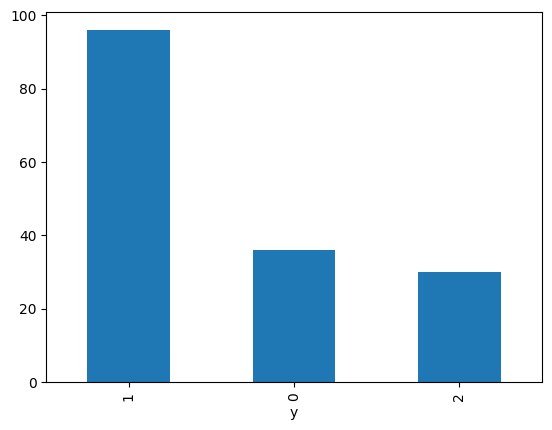

In [25]:
# Plot the distribution of the labels in the big dataset
big_df['y'].value_counts().plot(kind='bar')
plt.show()

In [26]:
# Resplit the dataset with an homogeneous distribution of the labels
big_X_train, big_X_test, big_y_train, big_y_test = train_test_split(big_X_features, big_y, test_size=0.2, stratify=big_y)

# Train a Random Forest Classifier
big_clf = RandomForestClassifier(random_state=42)
big_clf.fit(big_X_train, big_y_train)

# Report the train and test loss?
train_accuracy = big_clf.score(big_X_train, big_y_train)
test_accuracy = big_clf.score(big_X_test, big_y_test)

train_accuracy, test_accuracy

(1.0, 0.8787878787878788)

try to tweak the model hyperparameter to see if it works

In [27]:
# Tweaking the hyperparameters
big_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
big_clf.fit(big_X_train, big_y_train)

train_accuracy = big_clf.score(big_X_train, big_y_train)
test_accuracy = big_clf.score(big_X_test, big_y_test)

train_accuracy, test_accuracy

(1.0, 0.8787878787878788)

## Fourier transform features

We want now to see if a model using only fourier transform could work.

create a function get_fourier_coefficients(ecg)

In [28]:
def get_fourier_coefficients(ecg):
    return np.abs(np.fft.fft(ecg))

Using this function create a dataframe df_fourrier containing the fourrier transform coefficients and the label

In [29]:
df_fourier = pd.DataFrame(np.array([get_fourier_coefficients(row[1:]) for row in big_df.values]))

print(df_fourier.shape)
df_fourier.head()

(162, 65536)


,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,17599.976889,1850.171567,295.333800,1185.545859,926.385162,538.293366,828.133738,689.752202,1559.152560,545.466498,...,1161.365509,545.466498,1559.152560,689.752202,828.133738,538.293366,926.385162,1185.545859,295.333800,1850.171567
1,14484.396444,4137.499334,2152.391165,2520.424900,2066.642615,1640.749953,1579.574817,945.659290,1648.125085,1195.160663,...,537.355100,1195.160663,1648.125085,945.659290,1579.574817,1640.749953,2066.642615,2520.424900,2152.391165,4137.499334
2,10683.818667,400.463461,481.532272,729.461562,964.923609,946.182174,618.667927,1231.230068,82.521093,910.135298,...,745.443443,910.135298,82.521093,1231.230068,618.667927,946.182174,964.923609,729.461562,481.532272,400.463461
3,3536.462222,313.204866,531.520312,667.082007,647.502832,600.576281,620.723292,409.162029,2237.361623,501.455323,...,1011.333733,501.455323,2237.361623,409.162029,620.723292,600.576281,647.502832,667.082007,531.520312,313.204866
4,9756.496000,303.329945,596.020424,609.179346,380.981983,272.183845,1134.805832,111.595226,865.347508,194.837216,...,590.579985,194.837216,865.347508,111.595226,1134.805832,272.183845,380.981983,609.179346,596.020424,303.329945


Try to train a model using the Fourrier coefficient

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_fourier, big_y, test_size=0.5)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
accuracy

0.7407407407407407

Try to learn a model using both fourrier coefficient and the features from the previous sections. Does it work ?

In [31]:
# Combine the features and the Fourier coefficients
X_features = np.concatenate([big_X_features, df_fourier], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, big_y, test_size=0.5)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
accuracy

0.7530864197530864

## Wavelets

We now wants to use another signal decomposition which are called wavelet. Wavelet are a multi-scale function decomposition on a familly of functions generated from what is called a mother wavelet.

Using PyWavelet make a function get_wavelet_coefficients(ecg) that returns the wavelet coefficient of a given ECG


In [32]:
! pip install PyWavelets

In [33]:
import pywt

def get_wavelet_coefficients(ecg):
    return pywt.wavedec(ecg, 'db1')

Using the get_wavelet_coefficients, create a dataframe when the features are the coefficients and include the label

In [35]:
df_wavelet = pd.DataFrame([np.concatenate(get_wavelet_coefficients(row[1:])) for row in big_df.values])
df_wavelet.head()

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,-68.749910,-11.826685,-2.399030,1.236612,-4.656965,-2.297531,2.591033,-2.478539,-5.257261,-4.816248,...,0.065699,0.016719,0.053518,0.021233,0.014724,-0.040096,-0.045579,-0.042910,0.038852,0.117287
1,-56.579674,-27.244620,-14.731033,-5.047685,-14.456471,-0.901384,-3.216877,-3.811263,-8.080177,-1.256813,...,-0.010720,-0.015836,-0.018014,-0.048044,-0.036967,-0.004891,0.054351,0.036088,-0.000337,-0.029607
2,-41.733667,0.722720,2.982323,0.895042,2.758237,3.510943,3.709214,-0.779515,0.150140,-1.869702,...,-0.023410,0.025392,0.068484,0.084473,0.207043,-0.089120,-0.153329,-0.082890,-0.055987,-0.014258
3,13.814306,1.704916,-3.692958,-1.195417,-0.892720,-0.224864,-1.461370,2.788254,-6.178901,-0.277783,...,-0.017118,0.011268,0.044394,0.175267,-0.045659,-0.127169,-0.135989,0.065010,0.080593,0.014107
4,-38.111313,0.902173,1.229560,0.112356,-1.572446,-2.597243,2.557756,-2.462871,0.371768,0.754228,...,0.013890,0.004778,-0.050799,-0.437964,0.558049,-0.084620,0.043570,-0.033640,-0.107628,-0.159106


Train a random forest classifier with such features. DOes the model work

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_wavelet, big_y, test_size=0.5)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
accuracy

0.7160493827160493

The model do work but the accuracy is not as good as the one using the fourrier transform.

Add one or several of the previous feature functions and try to train another model

In [41]:
X_features = np.concatenate([big_X_features, df_wavelet], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, big_y, test_size=0.5)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
accuracy

0.654320987654321

Specify the methodology you used to train the model and report the various attempts results into a table

The methodology used is a simple train test split with a random forest classifier. The results are reported in the table below.

| Features | Precision |
|----------|-----------|



## Deep learning (1D CNN)

Now we want to see if we can skip all theses feature engineering techniques !
Design and train a multi-layer one dimensional CNN using the raw ECG signal as features.


Could you reach or surpass the feature based models ?

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(big_df.drop('y', axis=1), big_y, test_size=0.5)

X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

num_classes = len(np.unique(big_y))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Ensure the output layer has the correct number of classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

model.evaluate(X_test, y_test)

/home/jubuntu/anaconda3/envs/nlp/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2995 - loss: 13.7456 - val_accuracy: 0.6049 - val_loss: 10.3584
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6793 - loss: 7.0009 - val_accuracy: 0.4074 - val_loss: 7.0803
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6446 - loss: 4.0231 - val_accuracy: 0.5309 - val_loss: 5.0496
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7958 - loss: 1.9875 - val_accuracy: 0.7407 - val_loss: 6.7737
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8104 - loss: 3.9521 - val_accuracy: 0.7531 - val_loss: 3.5524
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.7320 - loss: 3.5733


[3.5524208545684814, 0.7530864477157593]

In [47]:
# Use the model to predict the labels

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Report the accuracy

accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
print(accuracy)

# Report the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Report the classification report
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step
0.7530864197530864
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        19
           1       0.71      1.00      0.83        49
           2       1.00      0.08      0.14        13

    accuracy                           0.75        81
   macro avg       0.90      0.55      0.57        81
weighted avg       0.82      0.75      0.70        81

